CODIGO Q- LEARNING

Conduccion automa para una ambilancia y para llevar a un paciente a un determinado hospital hallando cual sera el camino mas rapido y optimo por la ciudad para llegar al respectivo hospital y ser atendido.

In [1]:
import numpy as np
import random
import time
'''
laberinto = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 1, 1, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 1, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 1, 1, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
])
'''
'''13*13'''
laberinto = np.array([
    [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
    [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
    [0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0 ,0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]
])
estado_inicial = (1, 1)
# fila- coulmna
#estado_objetivo = (9, 9)
estado_objetivo = (11, 11)
# Parámetros de Q-Learningnum_estados = laberinto.shape
num_estados = laberinto.shape

num_acciones = 4
alpha = 0.4  # Tasa de aprendizaje
gamma = 0.9  # Factor de descuento dar mas valor
epsilon_inicial = 1.0  # Valor inicial de epsilon
epsilon_minimo = 0.1  # Valor mínimo de epsilon
num_episodios_decaimiento = 50  # epsilon se reduce gradualmente

# Inicializar la tabla de valores Q
Q = np.zeros((num_estados[0], num_estados[1], num_acciones))
#print("Tabla Q inicial:")
print(Q)

# Función epsilon-greedy para seleccionar acciones
def seleccionar_accion(estado, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(num_acciones))
    else:
        return np.argmax(Q[estado[0], estado[1]])

# Función para mover al agente en el laberinto
def mover_agente(estado, accion):
    if accion == 0:  # Mover hacia arriba
        nuevo_estado = max(estado[0] - 1, 0), estado[1]
    elif accion == 1:  # Mover hacia abajo
        nuevo_estado = min(estado[0] + 1, num_estados[0] - 1), estado[1]
    elif accion == 2:  # Mover a la izquierda
        nuevo_estado = estado[0], max(estado[1] - 1, 0)
    elif accion == 3:  # Mover a la derecha
        nuevo_estado = estado[0], min(estado[1] + 1, num_estados[1] - 1)
    # Si el nuevo estado es una pared, no mover al agente
    if laberinto[nuevo_estado[0], nuevo_estado[1]] == 1:
        return estado
    return nuevo_estado
# Función para imprimir el laberinto
def imprimir_laberinto(estado):
    #clear_output(wait=True)
    laberinto_visual = np.copy(laberinto)
    laberinto_visual[estado[0], estado[1]] = 2  # Marcar la posición actual del agente
    for fila in laberinto_visual:

        print(''.join(['#' if cell == 1 else 'A' if cell == 2 else  ' ' for cell in fila]))
    #time.sleep(0.05)

import matplotlib.pyplot as plt
from IPython.display import clear_output

def dibujar_laberinto(estado):

    laberinto_visual = np.copy(laberinto)
    laberinto_visual[estado[0], estado[1]] = 2  # Marcar la posición actual del agente
    time.sleep(0.4)
    clear_output(wait=True)  # Borra la salida de la celda
    plt.imshow(laberinto_visual, cmap='hot')
    plt.show()

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]


ETAPA DE ENTRENAMIENTO

El Agente en esta caso el coche ambulacia debe conocer todo su entorno para hallar la ruta mas optima al hospital establecido

con 1200 episodios y una recompensa de 100 al llegar al objetivo

In [2]:
num_episodios = 1200
epsilon = epsilon_inicial
for episodio in range(num_episodios):
    estado = estado_inicial

    while estado != estado_objetivo:
        accion = seleccionar_accion(estado, epsilon)
        nueva_estado = mover_agente(estado, accion)
        # Calcular la recompensa
        if laberinto[nueva_estado[0], nueva_estado[1]] == 1:
            recompensa = -100  # Penalización alta

        elif nueva_estado == estado_objetivo:  # Objetivo
            recompensa = 100
        else:
            recompensa = -1

        Q[estado[0], estado[1], accion] += alpha * (recompensa + gamma * np.max(Q[nueva_estado[0], nueva_estado[1]])\
             - Q[estado[0], estado[1], accion])
        estado = nueva_estado

        #imprimir_laberinto(estado)  # Imprimir el laberinto en cada paso

    # Decaimiento de epsilon después de cada episodio
    if episodio < num_episodios_decaimiento:
        epsilon -= (epsilon_inicial - epsilon_minimo) / num_episodios_decaimiento
    else:
        epsilon = epsilon_minimo

Se han truncado las últimas 5000 líneas del flujo de salida.
#    #A#     
## #      ###
 # ## # # # #
#  ## ### # #
#     #      
  ### #  #  #
# #     ### #
#### ## #####
###### ### ##
#    #  #   #
## # ## ###  
   # #   #  #
# #### # #  #
#    # #     
## #  A   ###
 # ## # # # #
#  ## ### # #
#     #      
  ### #  #  #
# #     ### #
#### ## #####
###### ### ##
#    #  #   #
## # ## ###  
   # #   #  #
# #### # #  #
#    # #     
## #   A  ###
 # ## # # # #
#  ## ### # #
#     #      
  ### #  #  #
# #     ### #
#### ## #####
###### ### ##
#    #  #   #
## # ## ###  
   # #   #  #
# #### # #  #
#    # #     
## #    A ###
 # ## # # # #
#  ## ### # #
#     #      
  ### #  #  #
# #     ### #
#### ## #####
###### ### ##
#    #  #   #
## # ## ###  
   # #   #  #
# #### # #  #
#    # #     
## #     A###
 # ## # # # #
#  ## ### # #
#     #      
  ### #  #  #
# #     ### #
#### ## #####
###### ### ##
#    #  #   #
## # ## ###  
   # #   #  #
# #### # #  #
#    # #     
## #      ###
 

DATOS DE NUESTRA Q- TABLE

Estos son los datos establecidos para nuestra Q table que fue establecida por la etapa de entrenamiendo usando la formula basada en la ecuacion de bellman

In [3]:
print(Q)

[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-4.46643329e+00 -4.24491109e+00 -4.56404468e+00 -4.63670638e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-6.39737979e+00 -6.07926938e+00 -6.12418990e+00 -6.33653484e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 8.32479499e-01  8.32479686e-01  8.32413634

In [4]:
'''import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# Supongamos que your_array es la matriz tridimensional que proporcionaste
normalized_array = sigmoid(Q)

print(normalized_array)'''
import numpy as np
#Q = np.array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
#               ... (resto de los elementos)
#               [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Q= np.array(Q)
# Redondear y mostrar con notación científica
np.set_printoptions(precision=3, suppress=True, floatmode='maxprec_equal')
print(Q)


[[[  0.000   0.000   0.000   0.000]
  [  0.000   0.000   0.000   0.000]
  [  0.000   0.000   0.000   0.000]
  [  0.000   0.000   0.000   0.000]
  [  0.000   0.000   0.000   0.000]
  [  0.000   0.000   0.000   0.000]
  [ -4.466  -4.245  -4.564  -4.637]
  [  0.000   0.000   0.000   0.000]
  [  0.000   0.000   0.000   0.000]
  [  0.000   0.000   0.000   0.000]
  [ -6.397  -6.079  -6.124  -6.337]
  [  0.000   0.000   0.000   0.000]
  [  0.000   0.000   0.000   0.000]]

 [[  0.000   0.000   0.000   0.000]
  [  0.832   0.832   0.832   2.036]
  [  2.036   3.373   0.832   0.832]
  [ -4.572  -2.386   2.036  -8.266]
  [ -8.193  -8.234  -4.558  -8.214]
  [  0.000   0.000   0.000   0.000]
  [ -4.393  -4.299  -4.194  -3.995]
  [ -3.444  -4.255  -4.167  -4.062]
  [  0.000   0.000   0.000   0.000]
  [ -6.405  -6.384  -6.392  -6.052]
  [ -6.420  -6.056  -6.363  -5.667]
  [ -5.589  -5.278  -6.052  -5.602]
  [  0.000   0.000   0.000   0.000]]

 [[  0.000   0.000   0.000   0.000]
  [  0.000   0.000   0.0

In [5]:
estado = estado_inicial
while estado != estado_objetivo:
    accion = seleccionar_accion(estado, epsilon_minimo)
    nueva_estado = mover_agente(estado, accion)
    if laberinto[nueva_estado[0], nueva_estado[1]] != 1:  # Si la nueva celda no es una pared
        print(f"Agente se mueve de {estado} a {nueva_estado} mediante {accion}")
        estado = nueva_estado
        imprimir_laberinto(estado)

    else:
        print(f"Agente intenta moverse de {estado} a {nueva_estado}, pero hay una pared")

Agente se mueve de (1, 1) a (1, 2) mediante 3
###### ### ##
# A  #  #   #
## # ## ###  
   # #   #  #
# #### # #  #
#    # #     
## #      ###
 # ## # # # #
#  ## ### # #
#     #      
  ### #  #  #
# #     ### #
#### ## #####
Agente se mueve de (1, 2) a (2, 2) mediante 1
###### ### ##
#    #  #   #
##A# ## ###  
   # #   #  #
# #### # #  #
#    # #     
## #      ###
 # ## # # # #
#  ## ### # #
#     #      
  ### #  #  #
# #     ### #
#### ## #####
Agente se mueve de (2, 2) a (3, 2) mediante 1
###### ### ##
#    #  #   #
## # ## ###  
  A# #   #  #
# #### # #  #
#    # #     
## #      ###
 # ## # # # #
#  ## ### # #
#     #      
  ### #  #  #
# #     ### #
#### ## #####
Agente se mueve de (3, 2) a (3, 1) mediante 2
###### ### ##
#    #  #   #
## # ## ###  
 A # #   #  #
# #### # #  #
#    # #     
## #      ###
 # ## # # # #
#  ## ### # #
#     #      
  ### #  #  #
# #     ### #
#### ## #####
Agente se mueve de (3, 1) a (4, 1) mediante 1
###### ### ##
#    #  #   #
## # ## ###  


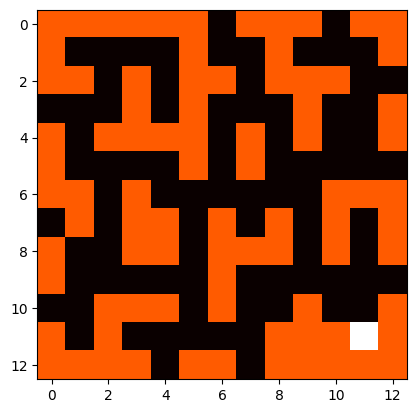

Agente alcanzó el estado objetivo: (11, 11)


In [6]:
# Función para obtener la dirección a partir del número de acción
def obtener_direccion(accion):
    if accion == 0:
        return "arriba"
    elif accion == 1:
        return "abajo"
    elif accion == 2:
        return "izquierda"
    elif accion == 3:
        return "derecha"
    else:
        return "acción desconocida"

# Inicia el bucle while con el estado inicial
estado = estado_inicial
while estado != estado_objetivo:
    accion = seleccionar_accion(estado, epsilon_minimo)
    nueva_estado = mover_agente(estado, accion)
    if laberinto[nueva_estado[0], nueva_estado[1]] != 1:
        dibujar_laberinto(estado)
        direccion = obtener_direccion(accion)
        print(f"Agente se mueve de {estado} a {nueva_estado} {direccion}")
        estado = nueva_estado

    else:
        print(f"Agente intenta moverse de {estado} a {nueva_estado}, pero hay una pared")

# Imprime el último estado (estado_objetivo)
dibujar_laberinto(estado_objetivo)
print(f"Agente alcanzó el estado objetivo: {estado_objetivo}")

In [9]:
estado_inicial = (10, 0)
#fila-columna
#estado_objetivo = (4, 4)
estado_objetivo = (10, 7)

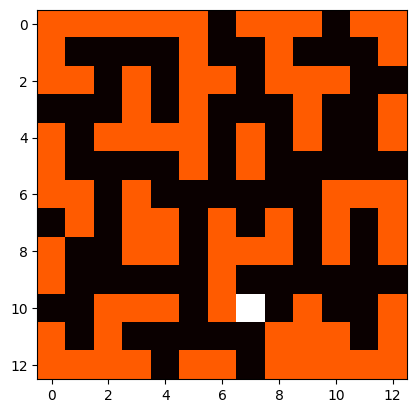

Agente alcanzó el estado objetivo: (10, 7)


In [10]:
# Función para obtener la dirección a partir del número de acción
def obtener_direccion(accion):
    if accion == 0:
        return "arriba"
    elif accion == 1:
        return "abajo"
    elif accion == 2:
        return "izquierda"
    elif accion == 3:
        return "derecha"
    else:
        return "acción desconocida"

# Inicia el bucle while con el estado inicial
estado = estado_inicial
while estado != estado_objetivo:
    accion = seleccionar_accion(estado, epsilon_minimo)
    nueva_estado = mover_agente(estado, accion)
    if laberinto[nueva_estado[0], nueva_estado[1]] != 1:
        dibujar_laberinto(estado)
        direccion = obtener_direccion(accion)
        print(f"Agente se mueve de {estado} a {nueva_estado} {direccion}")
        estado = nueva_estado

    else:
        print(f"Agente intenta moverse de {estado} a {nueva_estado}, pero hay una pared")

# Imprime el último estado (estado_objetivo)
dibujar_laberinto(estado_objetivo)
print(f"Agente alcanzó el estado objetivo: {estado_objetivo}")